# Relación entre polos y ceros continuos y discretizados

Discretizar por ZOH el sistema de tiempo contínuo $G(s)=\frac{1}{(s+1)^2}$

¿Qué relación se encuentra entre los polos y ceros de $G(s)$ y de $H(z)$?

In [48]:
import control as ctl
import numpy as np

G = ctl.tf([1],[1,2,1])
display(G)

poles,zeros = ctl.pzmap(G,plot=False)
print(f"Polos: {poles}\nCeros: {zeros}")

TransferFunction(array([1]), array([1, 2, 1]))

Polos: [-1.+6.68896751e-09j -1.-6.68896751e-09j]
Ceros: []


TransferFunction(array([0.00467884, 0.00437708]), array([ 1.        , -1.80967484,  0.81873075]), 0.1)

Polos: [0.90483742+1.03686892e-08j 0.90483742-1.03686892e-08j]
Ceros: [-0.93550468+0.j]


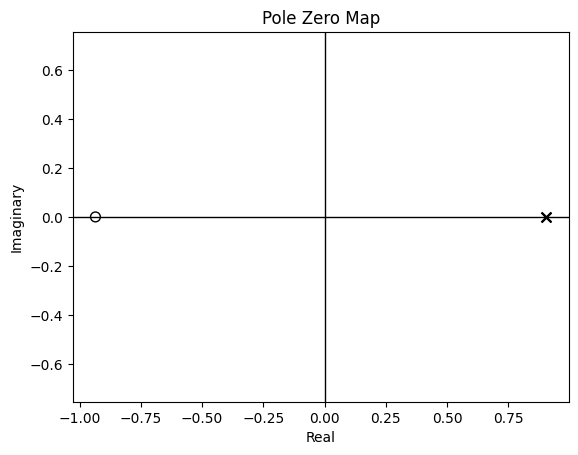

In [49]:
T = 0.1
H = ctl.c2d(G,T,method='zoh')
display(H)

poles_d,zeros_d = ctl.pzmap(H)
print(f"Polos: {poles_d}\nCeros: {zeros_d}")

In [50]:
print("Mapeo polos continuos:\n",np.exp(poles*T))
print(poles_d)

Mapeo polos continuos:
 [0.90483742+6.05242809e-10j 0.90483742-6.05242809e-10j]
[0.90483742+1.03686892e-08j 0.90483742-1.03686892e-08j]


## Aparición de ceros no mínimos

Repetir para el mismo sistema agregando un integrador puro

TransferFunction(array([1.]), array([1., 4., 5., 2.]))

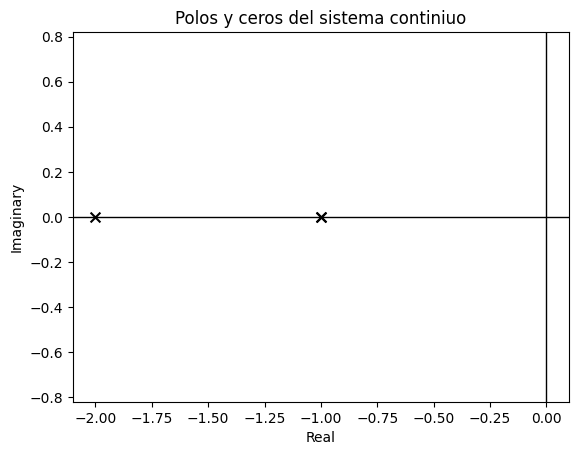

In [80]:
# Repetimos con un sistema de mayor orden

G = ctl.zpk([],[-1,-1,-2],1)
#G = ctl.tf([1],[1,2,1,1])
display(G)
poles,zeros = ctl.pzmap(G,title='Polos y ceros del sistema continiuo')


TransferFunction(array([0.22017161, 0.14277154, 0.00403258]), array([ 1.00000000e+00, -2.88986205e-01,  2.32731432e-02, -3.35462628e-04]), 2)

Polos: [0.13533528+2.84379295e-09j 0.13533528-2.84379295e-09j
 0.01831564+0.00000000e+00j]
Ceros: [-0.61885993+0.j -0.02959577+0.j]


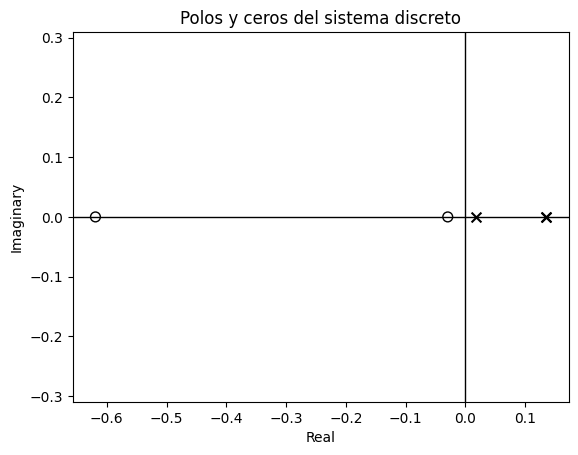

In [87]:
T = 2
H = ctl.c2d(G,T,method='zoh')
display(H)
poles_d,zeros_d = ctl.pzmap(H,title='Polos y ceros del sistema discreto')
print(f"Polos: {poles_d}\nCeros: {zeros_d}")


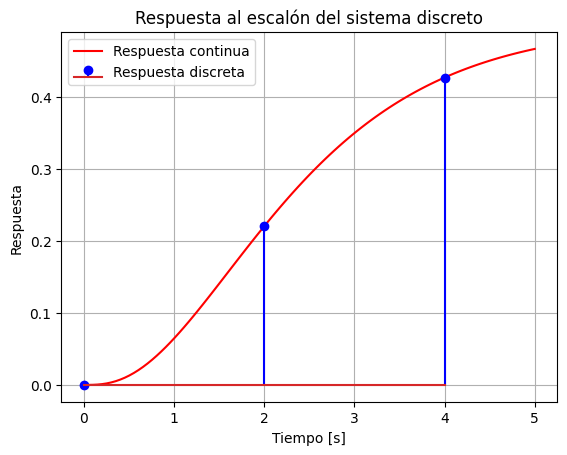

In [88]:
# Comprobamos la respuesta al escalón del sistema discreto

Tfin = 5
td,yd = ctl.step_response(H,T=np.arange(0,Tfin,T))
t,y = ctl.step_response(G,T=Tfin)
from matplotlib import pyplot as plt

plt.plot(t,y,'r',label='Respuesta continua')
plt.stem(td,yd,'b',label='Respuesta discreta')
plt.title("Respuesta al escalón del sistema discreto")
plt.xlabel("Tiempo [s]")
plt.ylabel("Respuesta")
plt.legend()
plt.grid()
plt.show()

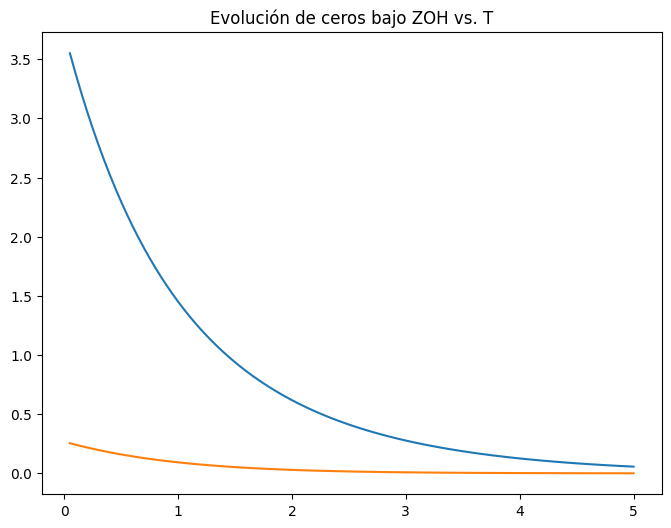

In [90]:
# Rango de T
T_values = np.linspace(0.05, 5.0, 100)
z_list = []

# Recolectar ceros para cada T
for T in T_values:
    H = ctl.c2d(G, T, method='zoh')
    p, z = ctl.pzmap(H,plot=False)
    z_list.append(z)

# --- Graficar trayectoria de ceros ---
plt.figure(figsize=(8, 6))
plt.plot(T_values,np.abs(z_list))
plt.title("Evolución de ceros bajo ZOH vs. T")
plt.show()
